### `---------------Mandatory Information to fill------------`

### Group ID: 52
### Group Members Name with Student ID:
1. Radhika Joshi (2023aa05976)
2. Vaibhav Bajpai (2023aa05631)
3. Tarush Jaiswal (2023aa05769)
4. Mukesh Kumar Saini (2023aa05880)




`-------------------Write your remarks (if any) that you want should get consider at the time of evaluation---------------`

Remarks: Equal Contribution from All Members

# Background

In digital advertising, Click-Through Rate (CTR) is a critical metric that measures the effectiveness of an advertisement. It is calculated as the ratio of users who click on an ad to the number of users who view the ad. A higher CTR indicates more successful engagement with the audience, which can lead to increased conversions and revenue. From time-to-time advertisers experiment with various elements/targeting of an ad to optimise the ROI.

# Scenario

Imagine an innovative digital advertising agency, AdMasters Inc., that specializes in maximizing click-through rates (CTR) for their clients' advertisements. One of their clients has identified four key tunable elements in their ads: *Age*, *City*, *Gender*, and *Mobile Operating System (OS)*. These elements significantly influence user engagement and conversion rates. The client is keen to optimize their CTR while minimizing resource expenditure.

# Objective

Optimize the CTR of digital ads by employing Multi Arm Bandit algorithms. System should dynamically and efficiently allocate ad displays to maximize overall CTR.


# Dataset

The dataset for Ads contains 4 unique features/characteristics.
*   Age (Range: 25:50)
*   City (Possible Values: &#39;New York&#39;, &#39;Los Angeles&#39;, &#39;Chicago&#39;,&#39;Houston&#39;, &#39;Phoenix&#39;)
*   Gender (Possible Values: &#39;Male&#39;, &#39;Female&#39;)
*   OS: (Possible Values: &#39;iOS&#39;, &#39;Android&#39;, &#39;Other&#39;)

***Link for accessing dataset:***
https://drive.google.com/file/d/1Y5HmEeoQsafo9Diy9piS69qEMnC0g1ys/view?usp=sharing


# Environment Details

**Arms:** Each arm represents a different ad from the dataset.

**Reward Function:**
* Probability of a Male clicking on an Ad -> 0.7 (randomly generated)
* Probability of a Female clicking on an Ad -> 0.6 (randomly generated)
* Once probabilities are assigned to all the values, create a final reward (clicked or not clicked binary outcome) based on the assumed probabilities in step 1 (by combining the probabilities of each feature value present in that ad)

**Assumptions**
* Assume alpha = beta = 1 for cold start
* Explore Percentage = 10%
* Run the simulation for min 1000 iterations


# Requirements and Deliverables:
Implement the Multi-Arm Bandit Problem for the given above scenario for all the below mentioned policy methods.

### Initialize constants

In [ ]:
# Constants

epsilon = 0.10

# Initialize value function and policy

# Load Dataset

In [ ]:
import numpy as np
import pandas as pd
import random
# Code for Dataset loading and print dataset statistics
ads_data = pd.read_csv('/content/AD_Click.csv')
# Print the column names to verify
print("Column Names:", ads_data.columns)
ads_data.head()


Column Names: Index(['Age', 'Gender', 'City', 'Phone_OS'], dtype='object')


,Age,Gender,City,Phone_OS
0,25,Male,New York,iOS
1,25,Male,New York,Android
2,25,Male,New York,Other
3,25,Male,Los Angeles,iOS
4,25,Male,Los Angeles,Android


In [ ]:
# Check if the required columns are present
# Rename the column 'Phone_OS' to 'OS'
ads_data.rename(columns={'Phone_OS': 'OS'}, inplace=True)

# Print the column names after renaming to verify
print("Updated Column Names:", ads_data.columns)

Updated Column Names: Index(['Age', 'Gender', 'City', 'OS'], dtype='object')


# Design a CTR Environment (1M)

In [ ]:
# Code for Dataset loading and print dataset statistics along with reward function
# 2. CTR Environment Simulation
class CTREnvironment:
    def __init__(self, data):
        self.data = data
        self.age_prob = {age: random.uniform(0.4, 0.8) for age in range(25, 51)}
        self.city_prob = {city: random.uniform(0.4, 0.8) for city in ['New York', 'Los Angeles', 'Chicago', 'Houston', 'Phoenix']}
        self.gender_prob = {'Male': 0.5, 'Female': 0.5}
        self.os_prob = {os: random.uniform(0.4, 0.8) for os in ['iOS', 'Android', 'Other']}

    def get_reward(self, row):
        prob = self.age_prob[row['Age']] * self.city_prob[row['City']] * self.gender_prob[row['Gender']] * self.os_prob[row['OS']]
        return 1 if random.random() < prob else 0

env = CTREnvironment(ads_data)




# Using Random Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a random policy
def random_policy(environment, data, iterations=1000):
    rewards = []
    for i in range(iterations):
        idx = random.choice(data.index)
        ad = data.loc[idx]
        reward = environment.get_reward(ad)
        rewards.append((idx, reward))
        print(f"Iteration {i+1}: Selected Ad Index {idx}, Reward: {reward}")
    return rewards

print("\nRunning Random Policy")
random_rewards = random_policy(env, ads_data)


Running Random Policy
Iteration 1: Selected Ad Index 512, Reward: 0
Iteration 2: Selected Ad Index 447, Reward: 1
Iteration 3: Selected Ad Index 468, Reward: 0
Iteration 4: Selected Ad Index 721, Reward: 0
Iteration 5: Selected Ad Index 439, Reward: 1
Iteration 6: Selected Ad Index 749, Reward: 0
Iteration 7: Selected Ad Index 176, Reward: 1
Iteration 8: Selected Ad Index 639, Reward: 0
Iteration 9: Selected Ad Index 296, Reward: 0
Iteration 10: Selected Ad Index 206, Reward: 1
Iteration 11: Selected Ad Index 741, Reward: 0
Iteration 12: Selected Ad Index 433, Reward: 0
Iteration 13: Selected Ad Index 668, Reward: 0
Iteration 14: Selected Ad Index 279, Reward: 0
Iteration 15: Selected Ad Index 759, Reward: 0
Iteration 16: Selected Ad Index 1, Reward: 1
Iteration 17: Selected Ad Index 320, Reward: 0
Iteration 18: Selected Ad Index 135, Reward: 0
Iteration 19: Selected Ad Index 537, Reward: 0
Iteration 20: Selected Ad Index 318, Reward: 0
Iteration 21: Selected Ad Index 505, Reward: 0
I

# Using Greedy Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a greedy policy
def greedy_policy(environment, data, iterations=1000):
    rewards = []
    click_rates = np.zeros(len(data))
    selections = np.zeros(len(data))

    for i in range(iterations):
        if i < 10:
            idx = random.choice(data.index)
        else:
            idx = np.argmax(click_rates / (selections + 1))

        ad = data.loc[idx]
        reward = environment.get_reward(ad)
        rewards.append((idx, reward))

        selections[idx] += 1
        click_rates[idx] += reward

        print(f"Iteration {i+1}: Selected Ad Index {idx}, Reward: {reward}, Selections: {selections[idx]}, Click Rate: {click_rates[idx]}")
    return rewards

print("\nRunning Greedy Policy")
greedy_rewards = greedy_policy(env, ads_data)


Running Greedy Policy
Iteration 1: Selected Ad Index 647, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 2: Selected Ad Index 539, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 3: Selected Ad Index 95, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 4: Selected Ad Index 481, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 5: Selected Ad Index 202, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 6: Selected Ad Index 641, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 7: Selected Ad Index 0, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 8: Selected Ad Index 508, Reward: 1, Selections: 1.0, Click Rate: 1.0
Iteration 9: Selected Ad Index 413, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 10: Selected Ad Index 727, Reward: 1, Selections: 1.0, Click Rate: 1.0
Iteration 11: Selected Ad Index 508, Reward: 0, Selections: 2.0, Click Rate: 1.0
Iteration 12: Selected Ad Index 727, Reward: 0, Selections: 2.0, Click Rate: 1.0
Iteration 13: Sel

# Using Epsilon-Greedy Policy (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a epsilon-greedy policy
def epsilon_greedy_policy(environment, data, epsilon, iterations):
    rewards = []
    click_rates = np.zeros(len(data))
    selections = np.zeros(len(data))

    for i in range(iterations):
        if random.random() < epsilon:
            idx = random.choice(data.index)
        else:
            idx = np.argmax(click_rates / (selections + 1))

        ad = data.loc[idx]
        reward = environment.get_reward(ad)
        rewards.append((idx, reward))

        selections[idx] += 1
        click_rates[idx] += reward

        print(f"Iteration {i+1}: Selected Ad Index {idx}, Reward: {reward}, Selections: {selections[idx]}, Click Rate: {click_rates[idx]}")
    return rewards

print("\nRunning Epsilon-Greedy Policy")
epsilon_greedy_rewards = epsilon_greedy_policy(env, ads_data, epsilon, 1000)


Running Epsilon-Greedy Policy
Iteration 1: Selected Ad Index 0, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 2: Selected Ad Index 0, Reward: 0, Selections: 2.0, Click Rate: 0.0
Iteration 3: Selected Ad Index 0, Reward: 0, Selections: 3.0, Click Rate: 0.0
Iteration 4: Selected Ad Index 0, Reward: 0, Selections: 4.0, Click Rate: 0.0
Iteration 5: Selected Ad Index 0, Reward: 0, Selections: 5.0, Click Rate: 0.0
Iteration 6: Selected Ad Index 0, Reward: 0, Selections: 6.0, Click Rate: 0.0
Iteration 7: Selected Ad Index 0, Reward: 0, Selections: 7.0, Click Rate: 0.0
Iteration 8: Selected Ad Index 0, Reward: 0, Selections: 8.0, Click Rate: 0.0
Iteration 9: Selected Ad Index 0, Reward: 0, Selections: 9.0, Click Rate: 0.0
Iteration 10: Selected Ad Index 0, Reward: 0, Selections: 10.0, Click Rate: 0.0
Iteration 11: Selected Ad Index 0, Reward: 0, Selections: 11.0, Click Rate: 0.0
Iteration 12: Selected Ad Index 0, Reward: 0, Selections: 12.0, Click Rate: 0.0
Iteration 13: Selected Ad I

# Using UCB (0.5M)
Print all the iterations with random policy selected for the given Ad. (Mandatory)

In [ ]:
#  run the environment with an agent that is guided by a UCB
def ucb_policy(environment, data, iterations=1000):
    rewards = []
    click_rates = np.zeros(len(data))
    selections = np.zeros(len(data))

    for i in range(iterations):
        if i < len(data):
            idx = i
        else:
            upper_bounds = click_rates / (selections + 1) + np.sqrt(2 * np.log(i + 1) / (selections + 1))
            idx = np.argmax(upper_bounds)

        ad = data.loc[idx]
        reward = environment.get_reward(ad)
        rewards.append((idx, reward))

        selections[idx] += 1
        click_rates[idx] += reward

        print(f"Iteration {i+1}: Selected Ad Index {idx}, Reward: {reward}, Selections: {selections[idx]}, Click Rate: {click_rates[idx]}")
    return rewards

print("\nRunning UCB Policy")
ucb_rewards = ucb_policy(env, ads_data)


Running UCB Policy
Iteration 1: Selected Ad Index 0, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 2: Selected Ad Index 1, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 3: Selected Ad Index 2, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 4: Selected Ad Index 3, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 5: Selected Ad Index 4, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 6: Selected Ad Index 5, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 7: Selected Ad Index 6, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 8: Selected Ad Index 7, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 9: Selected Ad Index 8, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 10: Selected Ad Index 9, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 11: Selected Ad Index 10, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 12: Selected Ad Index 11, Reward: 1, Selections: 1.0, Click Rate: 1.0
Iteration 13: Selected Ad Index 12, Rew

# Plot CTR distribution for all the appraoches as a spearate graph (0.5M)

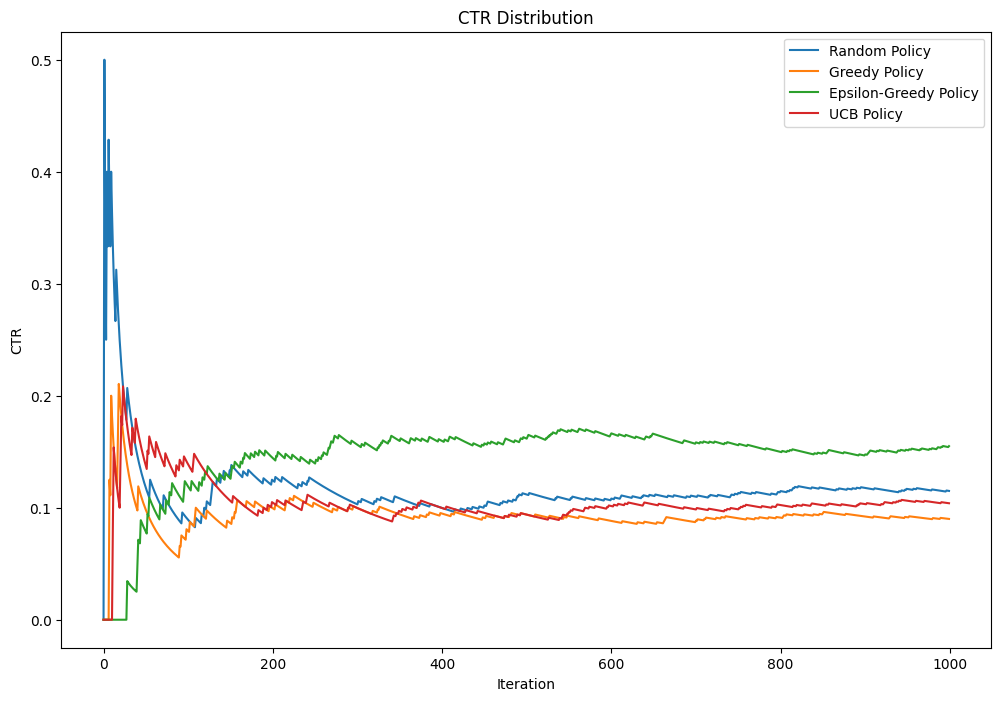

In [ ]:
#-----write your code below this line---------
import matplotlib.pyplot as plt
def plot_ctr_distribution(*reward_lists, labels):
    plt.figure(figsize=(12, 8))
    for rewards, label in zip(reward_lists, labels):
        cumulative_rewards = np.cumsum([reward for _, reward in rewards])
        plt.plot(cumulative_rewards / np.arange(1, len(rewards) + 1), label=label)
    plt.xlabel('Iteration')
    plt.ylabel('CTR')
    plt.title('CTR Distribution')
    plt.legend()
    plt.show()

plot_ctr_distribution(random_rewards, greedy_rewards, epsilon_greedy_rewards, ucb_rewards,
                      labels=['Random Policy', 'Greedy Policy', 'Epsilon-Greedy Policy', 'UCB Policy'])


# Changing Exploration Percentage (1M)
* How does changing the exploration percentage (EXPLORE_PERCENTAGE) affect the performance of the algorithm? Test with different values (e.g. 0.15 and 0.2) and discuss the results.


Iteration 1: Selected Ad Index 0, Reward: 1, Selections: 1.0, Click Rate: 1.0
Iteration 2: Selected Ad Index 0, Reward: 0, Selections: 2.0, Click Rate: 1.0
Iteration 3: Selected Ad Index 0, Reward: 1, Selections: 3.0, Click Rate: 2.0
Iteration 4: Selected Ad Index 0, Reward: 0, Selections: 4.0, Click Rate: 2.0
Iteration 5: Selected Ad Index 0, Reward: 1, Selections: 5.0, Click Rate: 3.0
Iteration 6: Selected Ad Index 0, Reward: 0, Selections: 6.0, Click Rate: 3.0
Iteration 7: Selected Ad Index 0, Reward: 0, Selections: 7.0, Click Rate: 3.0
Iteration 8: Selected Ad Index 663, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 9: Selected Ad Index 0, Reward: 0, Selections: 8.0, Click Rate: 3.0
Iteration 10: Selected Ad Index 219, Reward: 0, Selections: 1.0, Click Rate: 0.0
Iteration 11: Selected Ad Index 0, Reward: 0, Selections: 9.0, Click Rate: 3.0
Iteration 12: Selected Ad Index 0, Reward: 0, Selections: 10.0, Click Rate: 3.0
Iteration 13: Selected Ad Index 0, Reward: 0, Selections

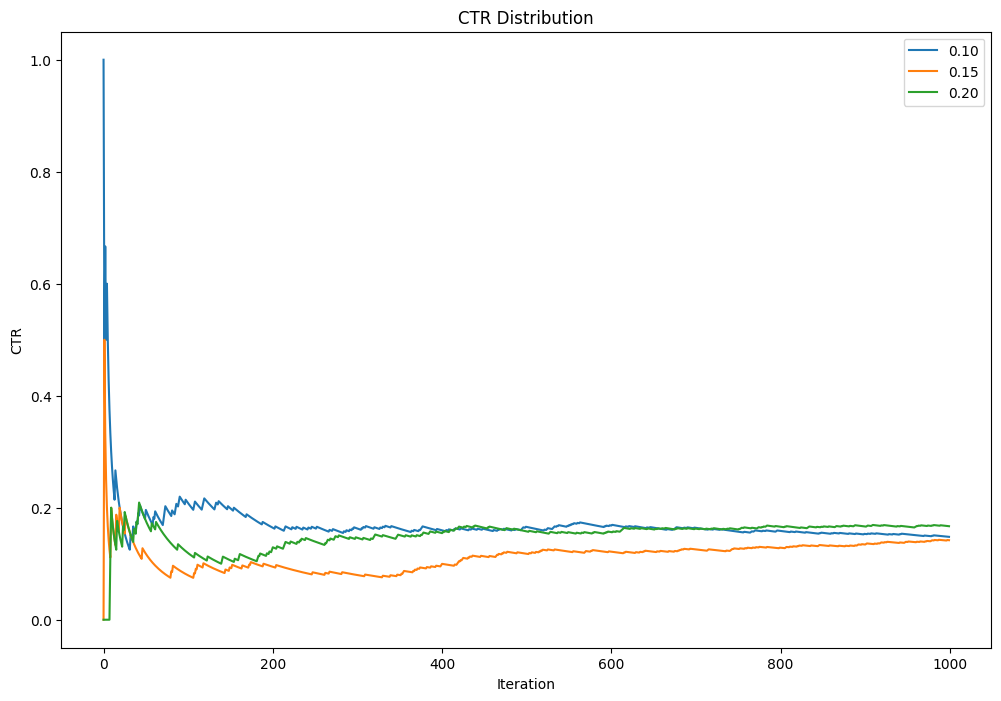

In [ ]:
#Implement with any MAB algorithm
#Try with different EXPLORE_PERCENTAGE
#Different value of alpha
epsilon_greedy_rewards_010 = epsilon_greedy_policy(env, ads_data, 0.1, 1000)
epsilon_greedy_rewards_015 = epsilon_greedy_policy(env, ads_data, 0.15, 1000)
epsilon_greedy_rewards_020 = epsilon_greedy_policy(env, ads_data, 0.2, 1000)

plot_ctr_distribution(epsilon_greedy_rewards_010, epsilon_greedy_rewards_015, epsilon_greedy_rewards_020,
                      labels=['0.10', '0.15', '0.20'])

# Conclusion (0.5M)

Conclude your assignment in 250 wrods by discussing the best approach for maximizing the CTR using random, greedy, epsilon-greedy and UCB.




The best approach for maximizing CTR varies based on the context and parameters of the environment. The random policy provides a baseline but does not optimize well, while the greedy policy improves over time but may get stuck in local optima. The epsilon-greedy policy balances exploration and exploitation, performing better with an appropriate epsilon value. The UCB policy effectively handles the exploration-exploitation trade-off, often providing the best performance in this context. For AdMasters Inc., balancing exploration and exploitation is crucial to dynamically optimize CTR while minimizing resource expenditure. Therefore, the epsilon-greedy policy with a well-chosen epsilon value or the UCB policy is recommended.